Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import LabelEncoder


In [2]:
startups = pd.read_csv('C:/Users/harsh/Downloads/50_Startups.csv')
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#deleting the columns which doesnt contribute much to the model building
#startups.drop('State',inplace=True,axis=0)
startups.pop("State")
startups.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [4]:
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [5]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


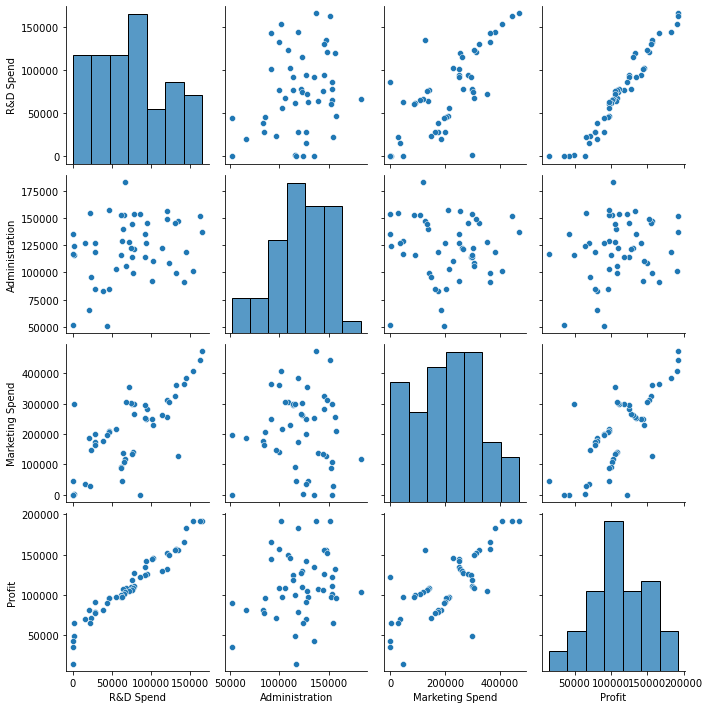

In [7]:
sns.pairplot(startups)

In [8]:
startups.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [9]:
startups.columns=['Research','Admin','Market','Profit']

In [10]:
model=smf.ols('Profit~Research+Admin+Market',data=startups).fit()
#model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           4.53e-30
Time:                        21:48:27   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Research       0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Market         0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model_R=smf.ols('Profit~Research',data=startups).fit()
model_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           3.50e-32
Time:                        21:48:27   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
Research       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
model_A=smf.ols('Profit~Admin',data=startups).fit()
model_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sat, 28 Aug 2021   Prob (F-statistic):              0.162
Time:                        21:48:27   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model_M=smf.ols('Profit~Market',data=startups).fit()
model_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           4.38e-10
Time:                        21:48:27   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Market         0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Finding vif to figure out how much correlation is there among the independent variables

In [20]:
model_vif_R=smf.ols('Research~Admin+Market',data=startups).fit().rsquared
vif_R=1/(1-model_vif_R)
vif_R

2.468903069994701

In [16]:
model_vif_A=smf.ols('Admin~Market+Research',data=startups).fit().rsquared
vif_A=1/(1-model_vif_A)
vif_A

1.1750910070550455

In [17]:
model_vif_M=smf.ols('Market~Research+Admin',data=startups).fit().rsquared
vif_M=1/(1-model_vif_M)
vif_M

2.3267732905308773

In [21]:
df={'variables':['Research','Admin','Market'],'vif':[vif_R,vif_A,vif_M]}
vif_df=pd.DataFrame(df)
vif_df
                 

,variables,vif
0,Research,2.468903
1,Admin,1.175091
2,Market,2.326773


In [22]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

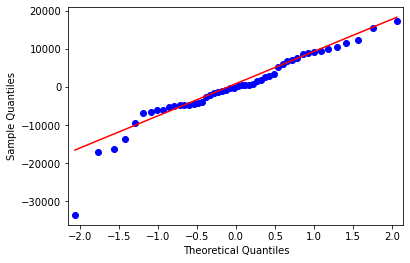

In [23]:
qq_plot=sm.qqplot(model.resid,line='q')


In [24]:
list(np.where(model.resid< -20000))

[array([49], dtype=int64)]

In [ ]:
startups.head()

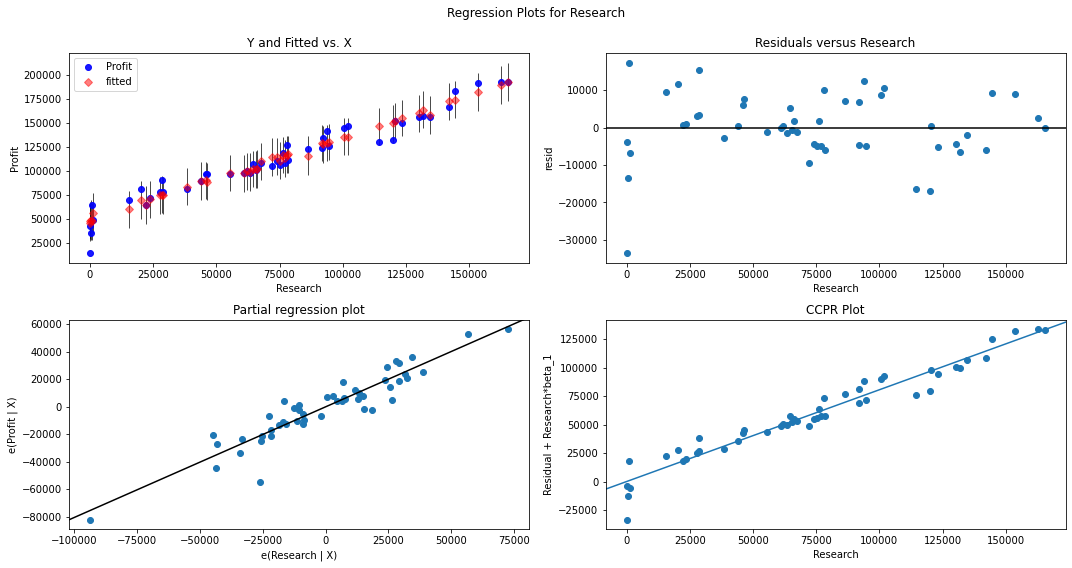

In [25]:
fig_R=plot.figure(figsize=(15,8))
fig_R=sm.graphics.plot_regress_exog(model,'Research',fig=fig_R)
plot.show()



In [ ]:
fig_A=plot.figure(figsize=(15,8))
fig_A=sm.graphics.plot_regress_exog(model,'Admin',fig=fig_A)
plot.show()


In [ ]:
fig_M=plot.figure(figsize=(15,8))
fig_M=sm.graphics.plot_regress_exog(model,'Market',fig=fig_M)
plot.show()


In [26]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
print(c,_)

[3.21825244e-05 3.27591036e-03 3.23842699e-02 2.17206555e-02
 1.44833032e-02 1.17158463e-02 2.91766303e-03 3.56513444e-03
 4.04303948e-05 4.86758017e-03 1.51064757e-02 1.63564959e-02
 1.15516625e-02 4.01422811e-03 6.12934253e-02 3.40013448e-02
 8.33556413e-03 3.30534399e-03 2.16819303e-03 4.07440577e-02
 4.25137222e-04 1.09844352e-02 2.91768000e-03 2.76030254e-04
 5.04643588e-03 3.00074623e-03 3.41957068e-03 2.98396413e-02
 1.31590664e-03 1.25992620e-04 4.18505125e-05 9.27434786e-06
 7.08656521e-04 1.28122674e-04 2.09815032e-02 6.69508674e-03
 5.55314705e-02 6.55050578e-05 5.61547311e-02 1.54279607e-03
 1.84850929e-03 1.97578066e-03 1.36089280e-04 2.05553171e-02
 1.23156041e-04 9.03234206e-02 5.45303387e-02 5.33885616e-03
 1.90527441e-01 2.88082293e-01] [1.         0.99997771 0.99791128 0.99904583 0.9995713  0.99971836
 0.99998231 0.99997361 1.         0.9999509  0.99953404 0.99945472
 0.99972613 0.99996657 0.99282118 0.99770282 0.99985673 0.99997731
 0.99999022 0.99673318 0.99999962 0

Text(0, 0.5, 'column')

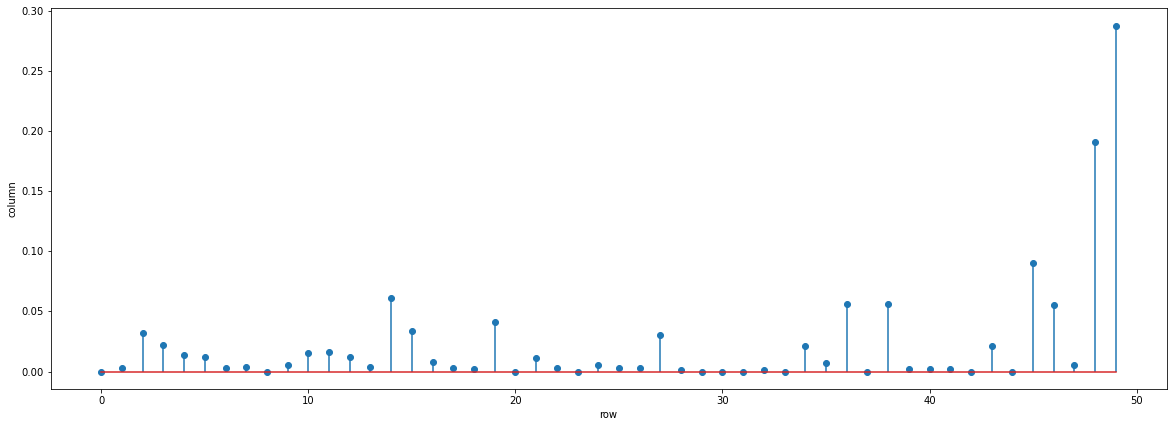

In [27]:
#plot influence using stem plot
fig=plot.subplots(figsize=(20,7))
plot.stem(np.arange(len(startups)),np.round(c,3));
plot.xlabel('row')
plot.ylabel('column')


In [28]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

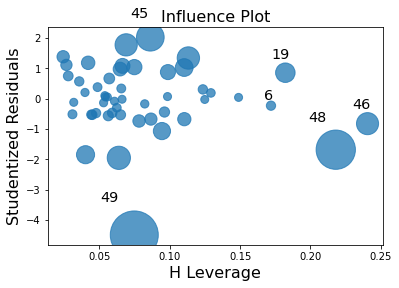

In [29]:
#another way of finding the influence
influence_plot(model)
plot.show()

In [ ]:
startups.shape

In [30]:
columns=startups.shape[1]
rows=startups.shape[0]
#print(columns,rows)
leverage=2*((columns+1)/rows)
leverage

0.2

In [31]:
startups[startups.index.isin([46,48,49])]

,Research,Admin,Market,Profit
46,1315.46,115816.21,297114.46,49490.75
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [38]:
data1 = pd.read_csv('50_Startups.csv')
data1.head(1)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.8,471784.1,New York,192261.83


In [46]:
data1.pop("State")
data1.head(1)

KeyError: 'State'

In [47]:
data2 = data1.drop(data1.index[[46,48,49]],axis  = 0).reset_index()

In [48]:
data2.head(1)

,index,R&D Spend,Administration,Marketing Spend,Profit
0,0,165349.2,136897.8,471784.1,192261.83


In [49]:
data2 = data2.drop(['index'],axis= 1)

In [54]:
data2.head(1)

,Research,Admin,Market,Profit
0,165349.2,136897.8,471784.1,192261.83


In [53]:
data2.columns=['Research','Admin','Market','Profit']

In [55]:
final= smf.ols('Profit~Research+Market',data = data2).fit()

In [92]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     529.6
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           1.65e-31
Time:                        14:20:39   Log-Likelihood:                -483.40
No. Observations:                  47   AIC:                             972.8
Df Residuals:                      44   BIC:                             978.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.171e+04   2358.725     21.924      0.000     4.7e+04    5.65e+04
Research       0.7439      0.037     19.902      0.000       0.669       0.819
Market         0.0323      0.014      2.376      0.022       0.005       0.060
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.292
Skew:                           0.000   Prob(JB):                        0.864
Kurtosis:                       2.614   Cond. No.                     5.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
(final.rsquared,final.aic,final.rsquared_adj)

(0.9601156240945741, 972.8030903954616, 0.9583026979170547)

In [57]:
model_influence = final.get_influence()
(c_, _) = model_influence.cooks_distance

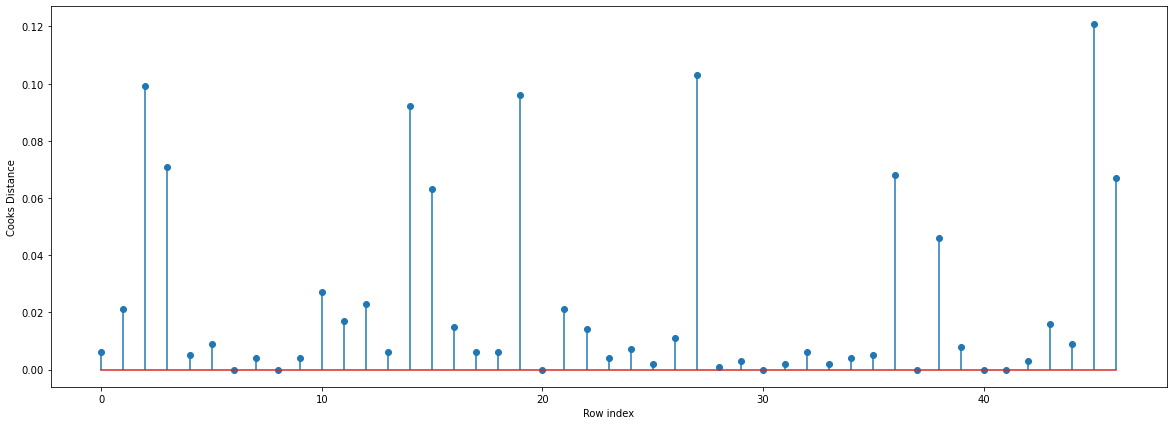

In [60]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c_,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [66]:
new_data=pd.DataFrame({"Research":165349,"Market":471784.1},index=[1])
new_data

,Research,Market
1,165349,471784.1


In [67]:
#now predicting by giving the unseen data
final.predict(new_data)

1    189947.052552
dtype: float64

# question 2
to find the price of toyota cars

In [74]:
cars = pd.read_csv('ToyotaCorolla.csv',encoding='ISO-8859-1')
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [78]:
#cars.pop('Id')
cars.pop('Cylinders')

0       4
1       4
2       4
3       4
4       4
       ..
1431    4
1432    4
1433    4
1434    4
1435    4
Name: Cylinders, Length: 1436, dtype: int64

In [79]:
cars.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0


In [83]:
cars.corr()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Price,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,-0.012069,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,0.151442,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725
Doors,0.185326,-0.148359,-0.012069,0.151442,-0.036197,0.092424,0.085243,-0.027654,0.079903,1.000000,...,0.132092,0.107626,0.059792,-0.008318,0.064705,-0.129881,-0.022542,-0.039555,-0.008265,0.102292


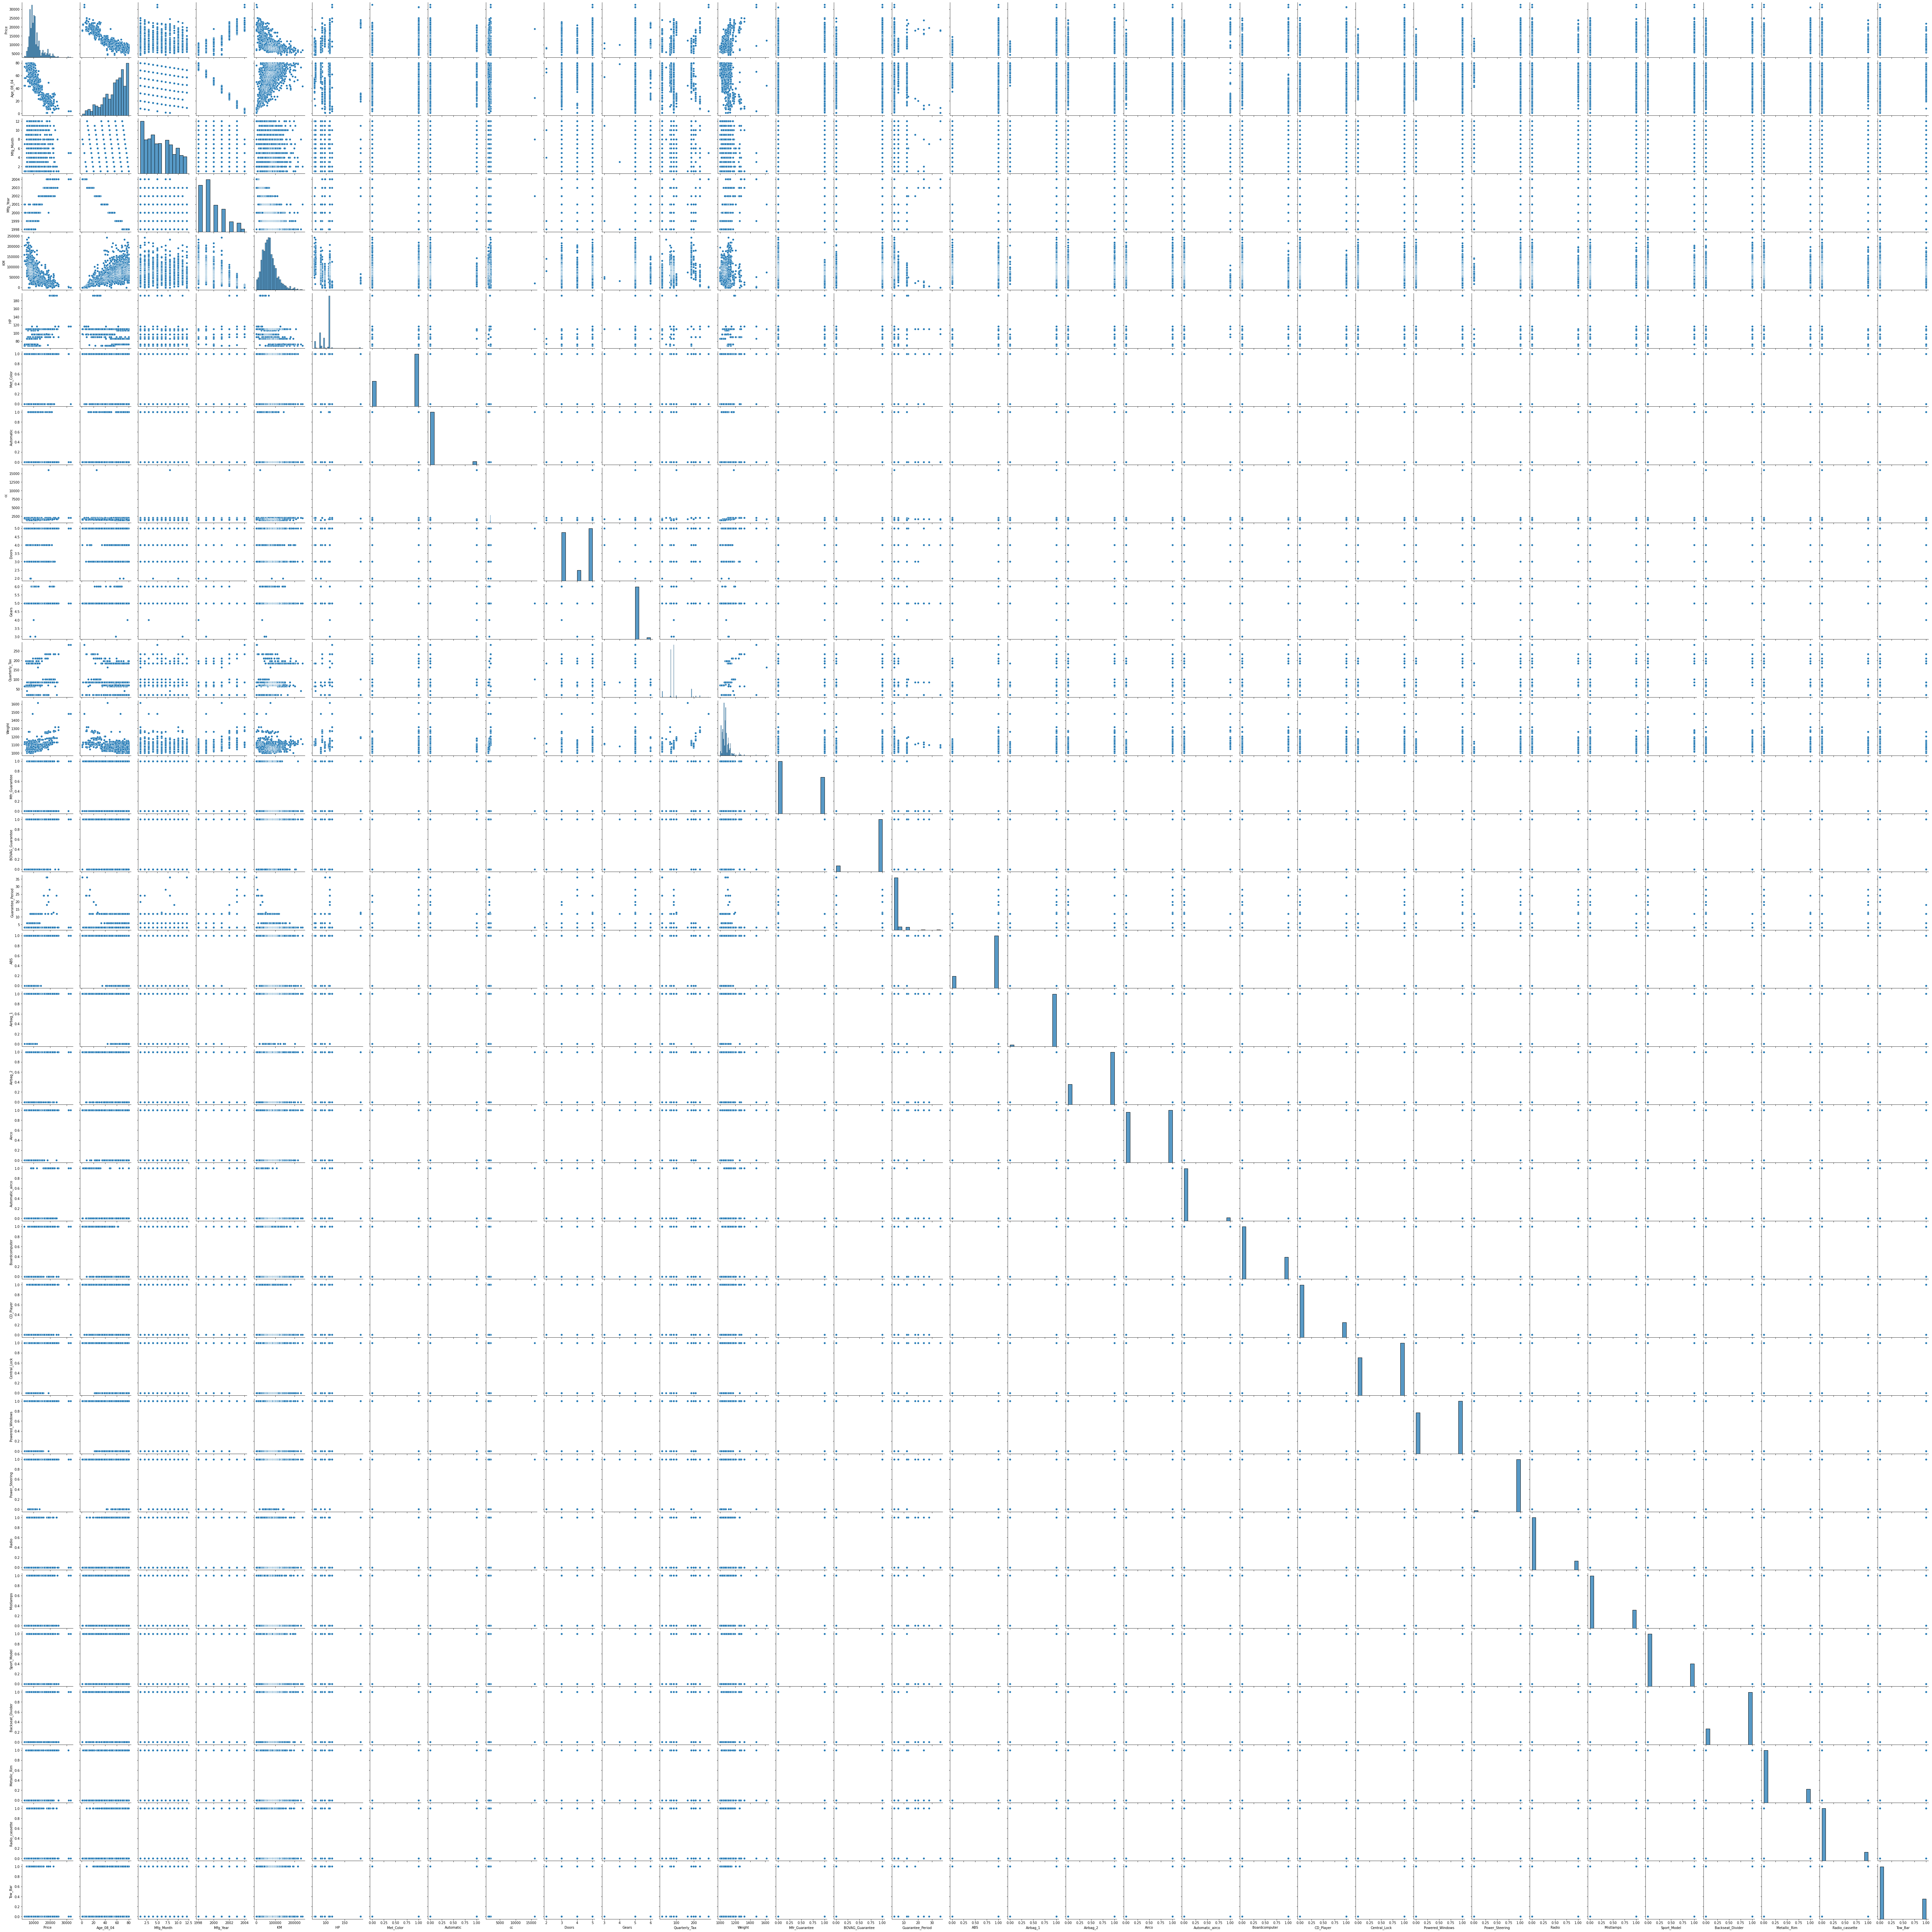

In [81]:
sns.pairplot(cars)

In [87]:
cars.columns = ['Age_08_04','Mfg_Year','KM','Price']

ValueError: Length mismatch: Expected axis has 36 elements, new values have 4 elements

In [169]:
model_c = smf.ols('Price~Age_08_04+Mfg_Year+KM',data=cars).fit()
model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:34:24   Log-Likelihood:                -12635.
No. Observations:                1436   AIC:                         2.528e+04
Df Residuals:                    1432   BIC:                         2.530e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.132e+06   3.07e+05    -10.213      0.000   -3.73e+06   -2.53e+06
Age_08_04    -26.6610     12.680     -2.103      0.036     -51.534      -1.788
Mfg_Year    1572.8520    153.000     10.280      0.000    1272.724    1872.980
KM            -0.0158      0.001    -12.050      0.000      -0.018      -0.013
==============================================================================
Omnibus:                      442.925   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3838.145
Skew:                           1.182   Prob(JB):                         0.00
Kurtosis:                      10.652   Cond. No.                     5.65e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
model_age = smf.ols('Price~Age_08_04',data = cars).fit()
model_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:07:39   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age_08_04   -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
model_mfg = smf.ols('Price~Mfg_Year',data = cars).fit()
model_mfg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     5190.
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:08:42   Log-Likelihood:                -12708.
No. Observations:                1436   AIC:                         2.542e+04
Df Residuals:                    1434   BIC:                         2.543e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.156e+06   5.78e+04    -71.854      0.000   -4.27e+06   -4.04e+06
Mfg_Year    2083.7253     28.925     72.040      0.000    2026.986    2140.464
==============================================================================
Omnibus:                      338.187   Durbin-Watson:                   1.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3398.345
Skew:                           0.797   Prob(JB):                         0.00
Kurtosis:                      10.366   Cond. No.                     2.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
model_km = smf.ols('Price~KM',data = cars).fit()
model_km.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          1.76e-124
Time:                        16:09:19   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
KM            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
model_vif_age = smf.ols('Age_08_04~Mfg_Year+KM',data = cars).fit().rsquared
vif_age=1/(1-model_vif_age)
vif_age
#model_vif_age.summary()

30.956642112959617

In [106]:
model_vif_mfg = smf.ols('Mfg_Year~KM+Age_08_04',data = cars).fit().rsquared
vif_mfg=1/(1-model_vif_mfg)
vif_mfg
#model_vif_mfg.summary()

30.92734101146211

In [107]:
model_vif_km = smf.ols('KM~Mfg_Year+Age_08_04',data = cars).fit().rsquared
vif_km=1/(1-model_vif_km)
vif_km
#model_vif_km.summary()

1.3467465853876106

In [109]:
df = {'vari':['Age','mfg','km'],'values':[vif_age,vif_mfg,vif_km]}
df_frame = pd.DataFrame(df)
df_frame

,vari,values
0,Age,30.956642
1,mfg,30.927341
2,km,1.346747


In [111]:
model_c.resid

0      -2184.731661
1      -1524.605351
2      -1791.436114
3       -638.723601
4      -1882.216484
           ...     
1431   -1084.804861
1432    2315.776892
1433     -87.238970
1434   -1365.480335
1435   -1772.836981
Length: 1436, dtype: float64

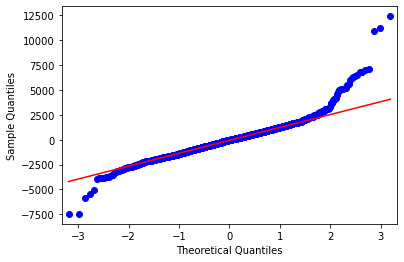

In [112]:
qq_plot=sm.qqplot(model_c.resid,line='q')

In [113]:
list(np.where(model_c.resid< -5000)or(model_c.resid>5000))

[array([191, 192, 393, 402, 601], dtype=int64)]

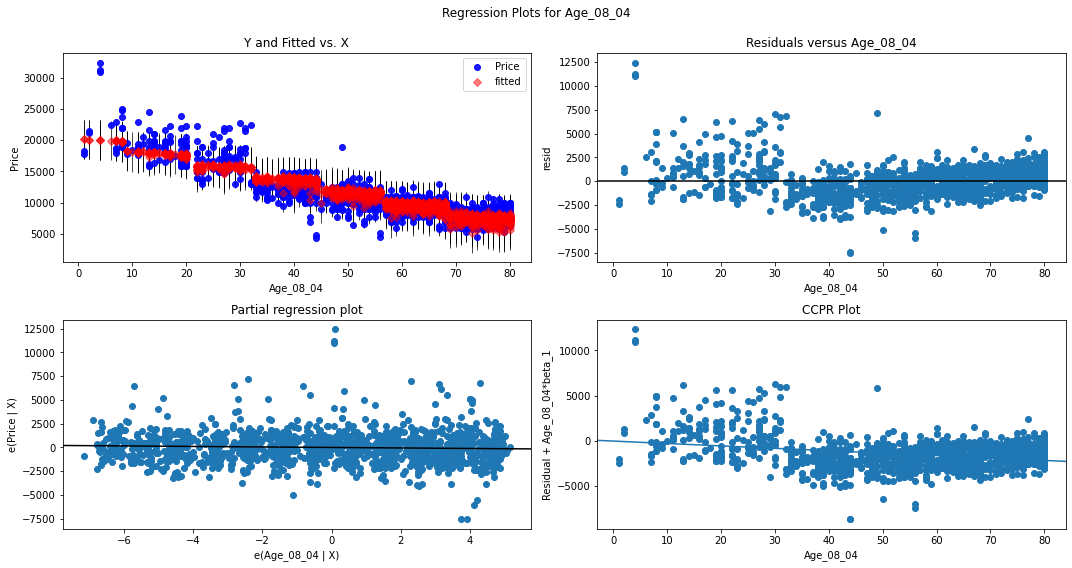

In [115]:
fig_a=plot.figure(figsize=(15,8))
fig_a=sm.graphics.plot_regress_exog(model_c,'Age_08_04',fig=fig_a)
plot.show()


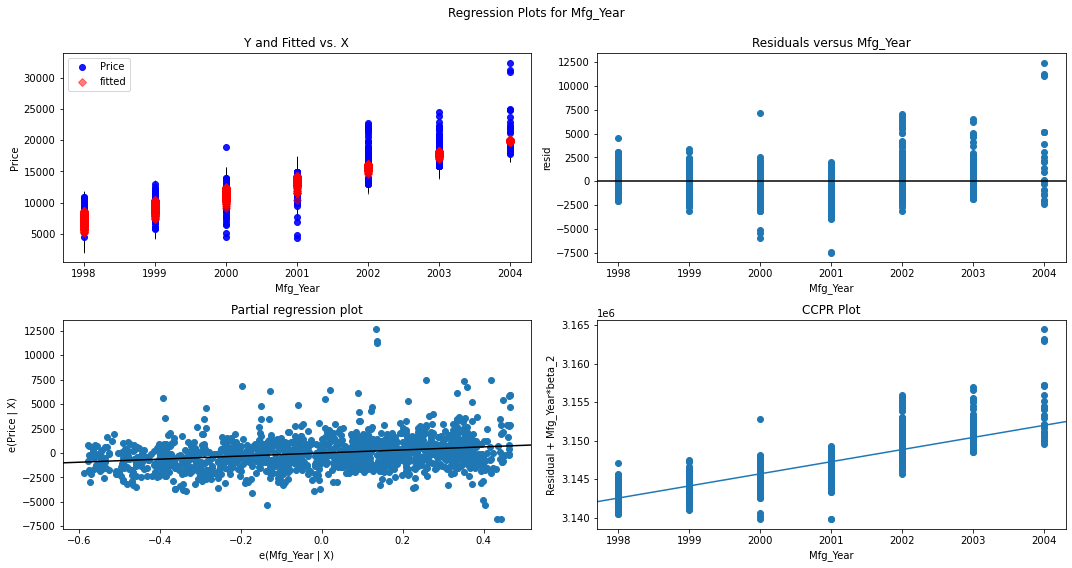

In [116]:
fig_m=plot.figure(figsize=(15,8))
fig_m=sm.graphics.plot_regress_exog(model_c,'Mfg_Year',fig=fig_m)
plot.show()


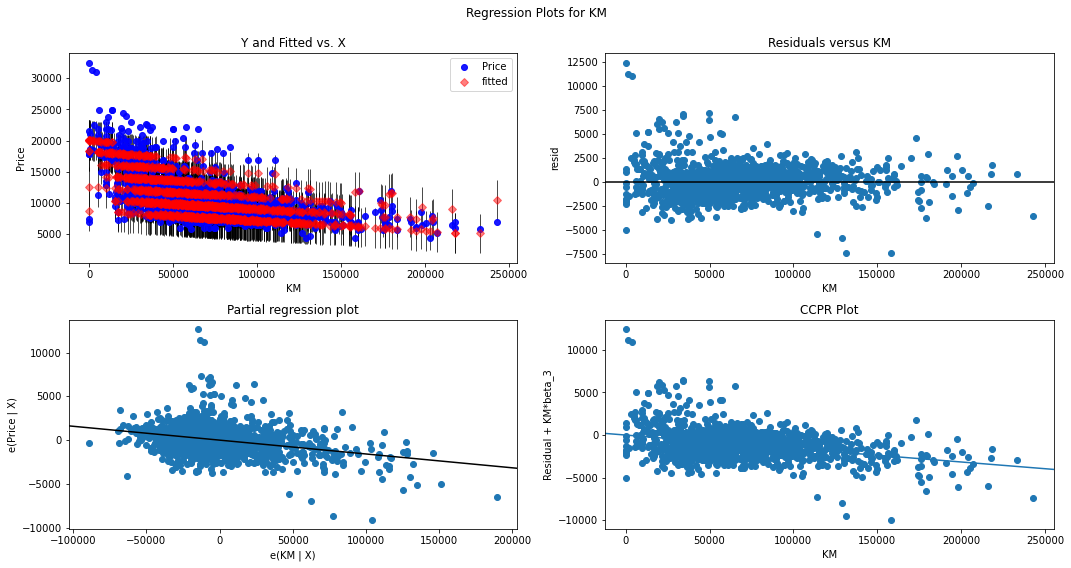

In [117]:
fig_k=plot.figure(figsize=(15,8))
fig_k=sm.graphics.plot_regress_exog(model_c,'KM',fig=fig_k)
plot.show()


In [118]:
model_influence=model_c.get_influence()
(c,_)=model_influence.cooks_distance
print(c,_)

[1.78311593e-03 1.05299957e-03 1.01415935e-03 ... 4.31648798e-06
 1.15903966e-03 2.09551558e-03] [0.99999365 0.99999778 0.99999794 ... 1.         0.99999731 0.99999123]


Text(0, 0.5, 'column')

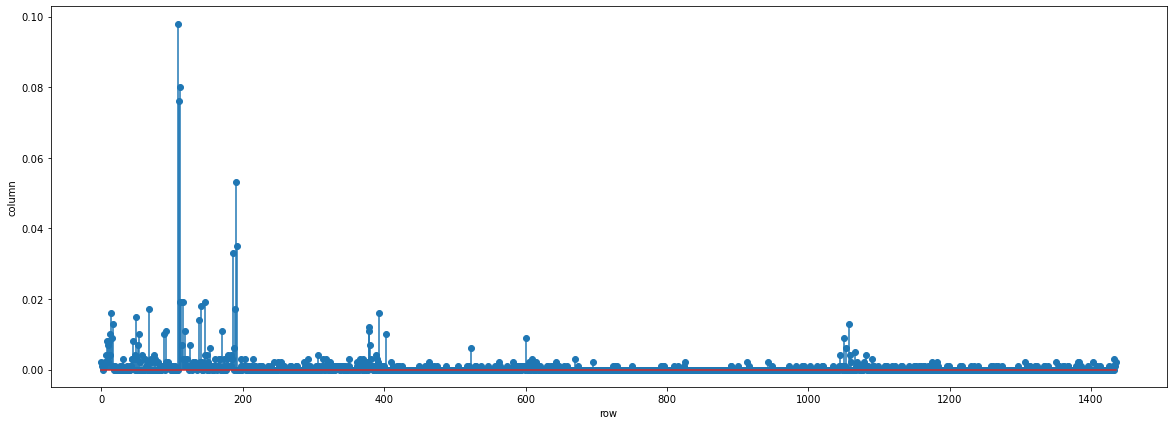

In [119]:
fig=plot.subplots(figsize=(20,7))
plot.stem(np.arange(len(cars)),np.round(c,3));
plot.xlabel('row')
plot.ylabel('column')

In [120]:
(np.argmax(c),np.max(c))

(109, 0.09788523500431992)

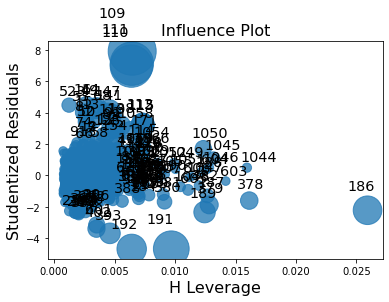

In [122]:
influence_plot(model_c)
plot.show()

In [125]:
columns=cars.shape[1]
rows=cars.shape[0]
#print(columns,rows)
leverage=2*((columns+1)/rows)
leverage

0.05153203342618384

In [126]:
cars[cars.index.isin([186,109,110,191])]

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
109,TOYOTA Corolla VERSO 2.0 D4D SOL (7) BNS MPV,32500,4,5,2004,1,Diesel,116,0,Grey,...,1,1,1,0,1,1,1,0,0,0
110,TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV,31000,4,5,2004,4000,Diesel,116,1,Grey,...,1,1,1,0,1,1,1,1,0,0
186,TOYOTA Corolla 1.9 D HATCHB SOL 2/3-Doors,6950,43,2,2001,243000,Diesel,69,0,White,...,1,1,1,1,1,0,1,1,1,0
191,TOYOTA Corolla 1.8D Stationwagen,4350,44,1,2001,158320,Diesel,69,0,White,...,1,1,1,0,0,0,0,0,0,0


In [158]:
cars1=pd.read_csv('ToyotaCorolla.csv',encoding='ISO-8859-1')

In [159]:
cars2 = cars1.loc[['Age_08_04','Mfg_Year','KM','Price',axis=1]]

SyntaxError: invalid syntax (<ipython-input-159-3062b60981bf>, line 1)

In [160]:
data_2 = cars1.drop(cars1.index[[186,109,110,191]],axis  = 0).reset_index()

In [161]:
data_2.head()

,index,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,...,1,1,1,0,0,0,1,0,0,0
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,...,1,0,1,0,0,0,1,0,0,0
2,2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,...,0,0,1,0,0,0,1,0,0,0
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,...,0,0,1,0,0,0,1,0,0,0
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,...,1,1,1,0,1,0,1,0,0,0


In [165]:
data_3 = data_2[['Age_08_04','Mfg_Year','KM','Price']]

In [167]:
final_ = smf.ols('Price~Age_08_04+Mfg_Year+KM',data=data_3).fit()

In [170]:
final_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     2077.
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:34:43   Log-Likelihood:                -12531.
No. Observations:                1432   AIC:                         2.507e+04
Df Residuals:                    1428   BIC:                         2.509e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.161e+06   2.93e+05    -10.796      0.000   -3.74e+06   -2.59e+06
Age_08_04    -24.4997     12.093     -2.026      0.043     -48.221      -0.778
Mfg_Year    1587.3817    146.097     10.865      0.000    1300.793    1873.970
KM            -0.0146      0.001    -11.498      0.000      -0.017      -0.012
==============================================================================
Omnibus:                      306.463   Durbin-Watson:                   1.373
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1620.575
Skew:                           0.893   Prob(JB):                         0.00
Kurtosis:                       7.896   Cond. No.                     5.64e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
new = {'Age_08_04':23,'Mfg_Year':2002,'KM':72937}

In [184]:
new = pd.DataFrame(new,index=[1])

In [183]:
final_.predict(new)

1    15234.528447
dtype: float64